In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part A:

In [36]:
#Runge-Kutta Algorithm for finding y-values from a first order ODE
#Inputs:
#    y0 = initial y-value (dependent variable)
#    t0 = initial t-value (independent variable)
#    tf = final t-value (independent variable)
#    dt = step size of t
#    derivative = function to be integrated (first order ODE)
#Outputs:
#    t = array of t-values
#    y = array of y-values

def runge_kutta_1d(y0, t0, tf, dt, derivative):
    #define array of t-values spanning from inital to final using the step size
    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t) #number of points between inital and final t-values
    
    #define zer0-array of y-values corresponding to the above t-values
    y = np.zeros(n_steps)
    y[0] = y0 #set inital y-value to y0
    
    #iterate through all points in t-array
    for n in range(n_steps-1):
        f = derivative(y[n], t[n]) #find derivative at the current point
        
        #find "intermediate values"
        y_star = y[n] + 0.5*dt*f
        t_star = t[n] + 0.5*dt
        f_star = derivative(y_star, t_star)
        
        #now calculate final "full" step
        y[n+1] = y[n] + dt*f_star

    #return the final t and y-value arrays
    return t, y

In [37]:
#define function that's our first order ODE
def CoffeeDeriv(T, t):
    DerivTemp = -0.00764*(T-Tr)
    return DerivTemp

In [38]:
#define constants and initial conditions
Tr = 22 #Room temperature in Celcius
Ti = 90 #Initial coffee temperature in Celcius

In [39]:
#5 second intervals
t1, T1 = runge_kutta_1d(Ti, 0, 45, (5/60), CoffeeDeriv)
index1 = int(30*(60/5))
print("5 second intervals at 30 minutes: " + str(T1[index1]) + " degrees Celcius")

#30 second intervals
t2, T2 = runge_kutta_1d(Ti, 0, 45, (30/60), CoffeeDeriv)
index2 = int(30*(60/30))
print("30 second intervals at 30 minutes: " + str(T2[index2]) + " degrees Celcius")

#1 min intervals
t3, T3 = runge_kutta_1d(Ti, 0, 45, 1, CoffeeDeriv)
index3 = int(30)
print("1 minute intervals at 30 minutes: " + str(T3[index3]) + " degrees Celcius")

#5 min intervals
t4, T4 = runge_kutta_1d(Ti, 0, 45, 5, CoffeeDeriv)
index4 = int(30/5)
print("5 minute intervals at 30 minutes: " + str(T4[index4]) + " degrees Celcius")

5 second intervals at 30 minutes: 76.07152572951745 degrees Celcius
30 second intervals at 30 minutes: 76.07155511943277 degrees Celcius
1 minute intervals at 30 minutes: 76.07164614923718 degrees Celcius
5 minute intervals at 30 minutes: 76.07462676106911 degrees Celcius


In [40]:
print("Previous results using Euler's Method:")
print("5 second intervals at 30 minutes: 76.06757819400462 degrees Celcius")
print("30 second intervals at 30 minutes: 76.04779864387505 degrees Celcius")
print("1 minute intervals at 30 minutes: 76.02396130566802 degrees Celcius")
print("5 minute intervals at 30 minutes: 75.82915335613369 degrees Celcius")

Previous results using Euler's Method:
5 second intervals at 30 minutes: 76.06757819400462 degrees Celcius
30 second intervals at 30 minutes: 76.04779864387505 degrees Celcius
1 minute intervals at 30 minutes: 76.02396130566802 degrees Celcius
5 minute intervals at 30 minutes: 75.82915335613369 degrees Celcius


The values coming out of the Runge-Kutta Algorithm and Euler's Method are very similar, but the runge-kutta values are all a lot more similar to each other (less variation) than the Euler's Method values. Additionally, all 4 time intervals with the Runge-Kutta Algorithm give a value close to the value of the smallest (5 second) time interval using Euler's Method.

# Part B:

In [41]:
Tr_iced = 21.999 #room temperature in degrees Celcius
Ti_iced = 1.000 #initial temperature of iced coffed in degrees Celcius

#derivative function for the Iced Coffee first order ODE
def IcedCoffeeDeriv(T,t):
    DerivTemp = -0.07640*(T - Tr_iced) #in minutes
    return DerivTemp

In [42]:
#5 second intervals
#shares time-array with hot-coffee example above
#differnt temp-array from hot-coffee example
t1, T1i = runge_kutta_1d(Ti_iced, 0, 45, (5/60), IcedCoffeeDeriv)
index1 = int(30*(60/5))
print("5 second intervals at 30 minutes: " + str(T1i[index1]) + " degrees Celcius")

#30 second intervals
t2, T2i = runge_kutta_1d(Ti_iced, 0, 45, (30/60), IcedCoffeeDeriv)
index2 = int(30*(60/30))
print("30 second intervals at 30 minutes: " + str(T2i[index2]) + " degrees Celcius")

#1 min intervals
t3, T3i = runge_kutta_1d(Ti_iced, 0, 45, 1, IcedCoffeeDeriv)
index3 = int(30)
print("1 minute intervals at 30 minutes: " + str(T3i[index3]) + " degrees Celcius")

#5 min intervals
t4, T4i = runge_kutta_1d(Ti_iced, 0, 45, 5, IcedCoffeeDeriv)
index4 = int(30/5)
print("5 minute intervals at 30 minutes: " + str(T4i[index4]) + " degrees Celcius")

5 second intervals at 30 minutes: 19.876721287484497 degrees Celcius
30 second intervals at 30 minutes: 19.87553654361981 degrees Celcius
1 minute intervals at 30 minutes: 19.87173696177045 degrees Celcius
5 minute intervals at 30 minutes: 19.71380326159644 degrees Celcius


The analytical solution to the first order ODE:
y = 21.999 - 20.999/e^0.0764t


In [43]:
#define function to calculate analytical solution
def analytical_solution(t):
    y = 21.999 - 20.999/(np.e**(0.0764*t))
    return y

#find the analytical solution at t=30 minutes
y_actual = analytical_solution(30)

In [49]:
print("The analytical solution is:", y_actual)
print("At 4 significant figures (from the 1.000 degrees C inital temperature), all the found solutions are:")
print()
print("Analytic Solution:", round(y_actual,2))
print("5 second intervals:", round(T1i[index1],2))
print("30 second intervals:", round(T2i[index2],2))
print("1 minute intervals:", round(T3i[index3],2))
print("5 minute intervals:", round(T4i[index4],2))


The analytical solution is: 19.876754306240283
At 4 significant figures (from the 1.000 degrees C inital temperature), all the found solutions are:

Analytic Solution: 19.88
5 second intervals: 19.88
30 second intervals: 19.88
1 minute intervals: 19.87
5 minute intervals: 19.71


As the time intervals get shorter, the temperature of the iced-coffee at 30 minutes gets closer and closer to the analytic solution (meaning the "guesses" get more precise as the time intervals get smaller). Assuming the analytic solution IS the real value, then the accuracy of our solutions also get better as the intervals get smaller.

With our current time intervals, the 5 second intervals and 30 second intervals are the most precise (equalling the analytic solution to 4 sig figs), while the 5 minute interval is the least precise. To get better precision, I would decrease the time interval even more.

# Part C:

<Figure size 640x480 with 0 Axes>

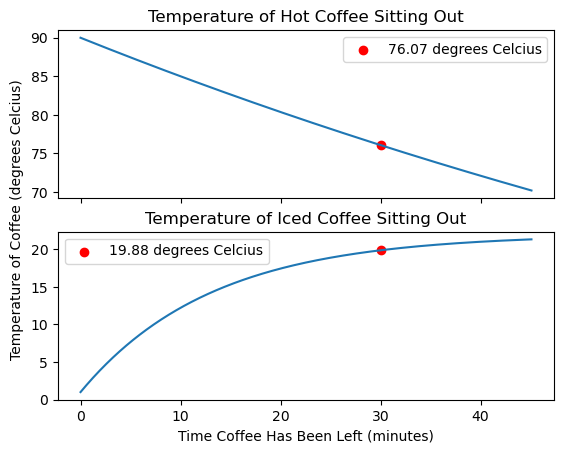

In [74]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True) #1 row, 2 columns, share x axis

ax1.plot(t1,T1)
ax1.scatter(30,T1[index1], color="r", label=str(round(T1[index1],2))+" degrees Celcius")
ax1.set_title("Temperature of Hot Coffee Sitting Out")
ax1.legend()

ax2.plot(t1,T1i)
ax2.scatter(30,T1i[index1], color="r", label=str(round(T1i[index1],2))+" degrees Celcius")
ax2.set_xlabel("Time Coffee Has Been Left (minutes)")
ax2.set_title("Temperature of Iced Coffee Sitting Out")
ax2.legend()

fig.text(0.05,0.2,"Temperature of Coffee (degrees Celcius)", rotation=90)
plt.show()